In [16]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import pairwise_distances
from random import randint
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt

In [17]:
root = "/Users/sasankauppu/Desktop/Data Mining CS6220/DataMining/ml-100k/"

u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
users = pd.read_csv(root+'u.user', sep='|', names=u_cols)

r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings = pd.read_csv(root+'u.data', sep='\t', names=r_cols, usecols=range(3))

m_cols = ['movie_id', 'title', 'release_date', 'video_release_date', 'imdb_url','unknown','Action','Adventure','Animation',
          'Childrens', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery',
          'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
movies = pd.read_csv(root+'u.item', sep='|', names=m_cols)

#movie_ratings = pd.merge(movies, ratings)
#lens = pd.merge(movie_ratings, users)

userratings=[[0 for i in range(len(movies))] for j in range(len(users))]

In [18]:
for i,r in ratings.iterrows():
    userratings[r[0]-1][r[1]-1]=r[2]

userratings = np.asarray(userratings)

In [19]:
userratings.shape

(943, 1682)

In [20]:
user_sim = pairwise_distances(userratings, metric='cosine')

In [21]:
testuserset=[]
for i in range(100):
    testuserset.append(randint(0,len(users)-1))

In [22]:
def run_knn(kbors=10):
    trmse=0
    
    for i in testuserset:
        knbors = np.argsort(user_sim[i])[::-1][:kbors+1]
        rat=[]
        for j in knbors:
            if j!=i:
                rat.append(userratings[j])
                
        y_pred=np.mean(rat,axis=0)
    
        y_actual = userratings[i]
        trmse += rmsecalc(y_actual, y_pred)
    
    return trmse/len(testuserset)

In [23]:
def rmsecalc(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [24]:
rmse=[]
for k in range(1,50):
    rmse.append(run_knn(k))

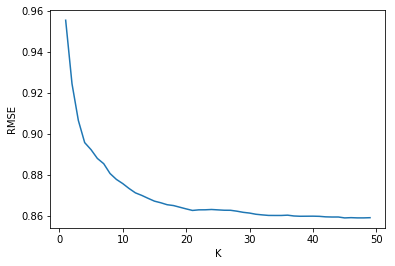

In [25]:
plt.plot(range(1,50), rmse)
plt.title("")
plt.ylabel("RMSE")
plt.xlabel("K")
plt.show()

In [26]:
user_sim = pairwise_distances(userratings, metric='euclidean')

In [27]:
testuserset=[]
for i in range(100):
    testuserset.append(randint(0,len(users)-1))

In [28]:
rmse=[]
for k in range(1,50):
    rmse.append(run_knn(k))

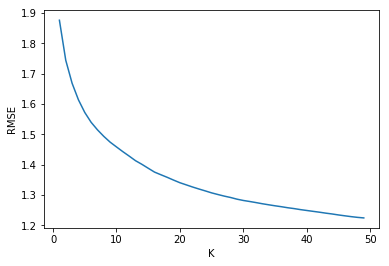

In [29]:
plt.plot(range(1,50), rmse)
plt.title("")
plt.ylabel("RMSE")
plt.xlabel("K")
plt.show()